# About Dataset
### Context

This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.
Content

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

- longitude

- latitude

- housing_median_age

- total_rooms

- total_bedrooms

- population

- households

- median_income

- median_house_value

- ocean_proximity

### About the Features

1. `longitude`: A measure of how far west a house is; a higher value is farther west

2. `latitude`: A measure of how far north a house is; a higher value is farther north

3. `housingMedianAge`: Median age of a house within a block; a lower number is a newer building

4. `totalRooms`: Total number of rooms within a block

5. `totalBedrooms`: Total number of bedrooms within a block

6. `population`: Total number of people residing within a block

7. `households`: Total number of households, a group of people residing within a home unit, for a block

8. `medianIncome`: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. `medianHouseValue`: Median house value for households within a block (measured in US Dollars)

10. `oceanProximity`: Location of the house w.r.t ocean/sea

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Cleaned_Dataset.csv")

In [3]:
# Copying the df
df_copy = df.copy()

## Feature Engineering

In [4]:
# Feature engineering

for i in range(len(df["ocean_proximity"])):
    if df_copy.loc[i,"ocean_proximity"]=="NEAR BAY":
        df_copy.loc[i,"ocean_proximity"]=0
    elif df_copy.loc[i,"ocean_proximity"]=="<1H OCEAN":
        df_copy.loc[i,"ocean_proximity"]=1
    elif df_copy.loc[i,"ocean_proximity"]=="INLAND":
        df_copy.loc[i,"ocean_proximity"]=2
    elif df_copy.loc[i,"ocean_proximity"]=="NEAR OCEAN":
        df_copy.loc[i,"ocean_proximity"]=3
    elif df_copy.loc[i,"ocean_proximity"]=="ISLAND":
        df_copy.loc[i,"ocean_proximity"]=4

    

- replaced the categorical features with numerical values:
    - 0 : NEAR BAY
    - 1 : <1H OCEAN
    - 2 : INLAND
    - 3 : NEAR OCEAN
    - 4 : ISLAND

In [5]:
df_copy["ocean_proximity"].unique()

array([0, 1, 2, 3, 4], dtype=object)

In [6]:
# Converted the object type to integer
df_copy["ocean_proximity"] =df_copy["ocean_proximity"].astype(int)

In [7]:
df = df_copy.copy()

In [8]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129,322,126,8.3252,45.26,0
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,35.85,0
2,-122.24,37.85,52,1467,190,496,177,7.2574,35.21,0
3,-122.25,37.85,52,1274,235,558,219,5.6431,34.13,0
4,-122.25,37.85,52,1627,280,565,259,3.8462,34.22,0


In [9]:
df.to_csv("Cat_fixed_Cleaned_Dataset.csv",index=False)

## Exploratory Data Analysis (EDA)

In [10]:
df = pd.read_csv("Cat_fixed_Cleaned_Dataset.csv")

In [15]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069259,0.099773,0.055310,-0.015176,-0.045967,0.180381
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066657,-0.108785,-0.071035,-0.079809,-0.144160,-0.067586
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318999,-0.296244,-0.302916,-0.119034,0.105623,-0.204882
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153,0.014818
total_bedrooms,0.069259,-0.066657,-0.318999,0.927253,1.000000,0.873909,0.974724,-0.007681,0.049454,0.004060
population,0.099773,-0.108785,-0.296244,0.857126,0.873909,1.000000,0.907222,0.004834,-0.024650,-0.008511
households,0.055310,-0.071035,-0.302916,0.918484,0.974724,0.907222,1.000000,0.013033,0.065843,-0.016911
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007681,0.004834,0.013033,1.000000,0.688075,-0.129135
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000,-0.210600
ocean_proximity,0.180381,-0.067586,-0.204882,0.014818,0.004060,-0.008511,-0.016911,-0.129135,-0.210600,1.000000


<Axes: >

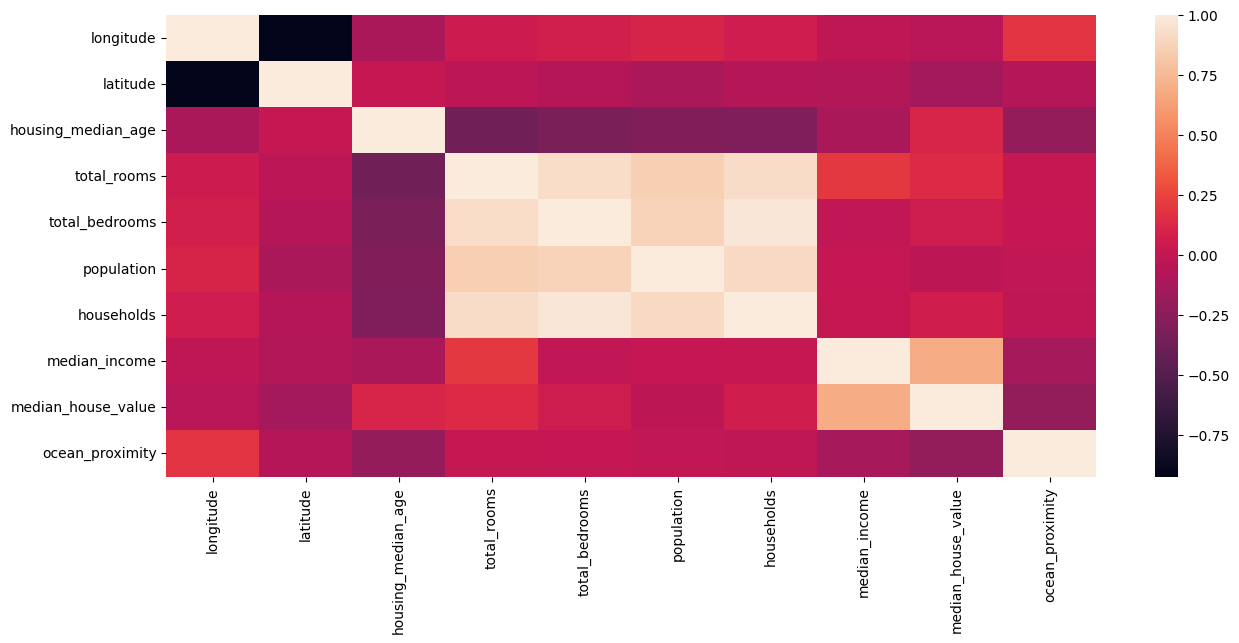

In [23]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr())

<Axes: xlabel='total_rooms', ylabel='population'>

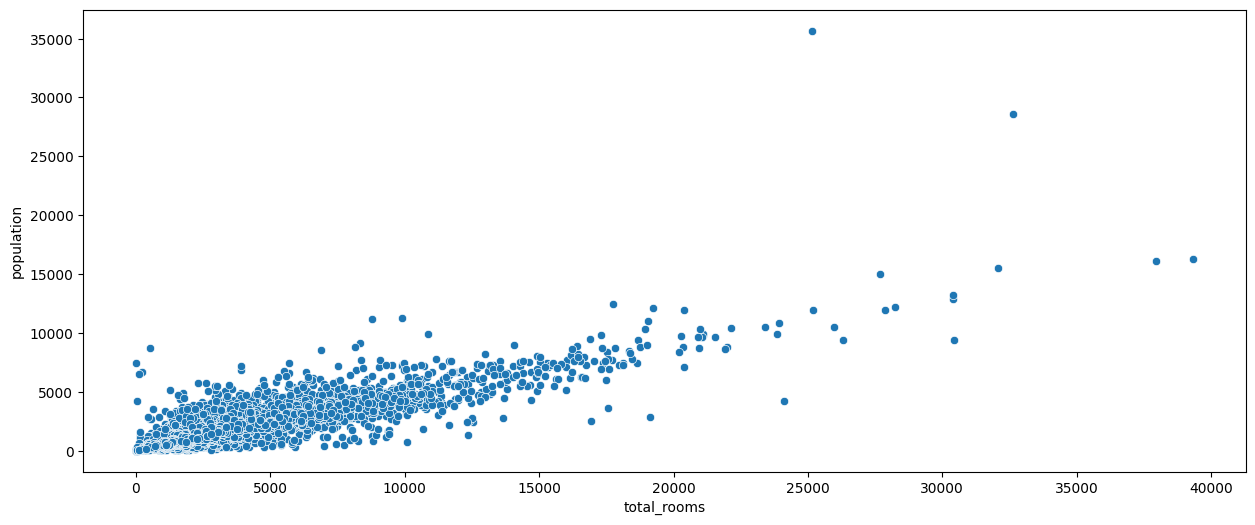

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df["total_rooms"],y=df["population"])

<Axes: xlabel='total_rooms', ylabel='households'>

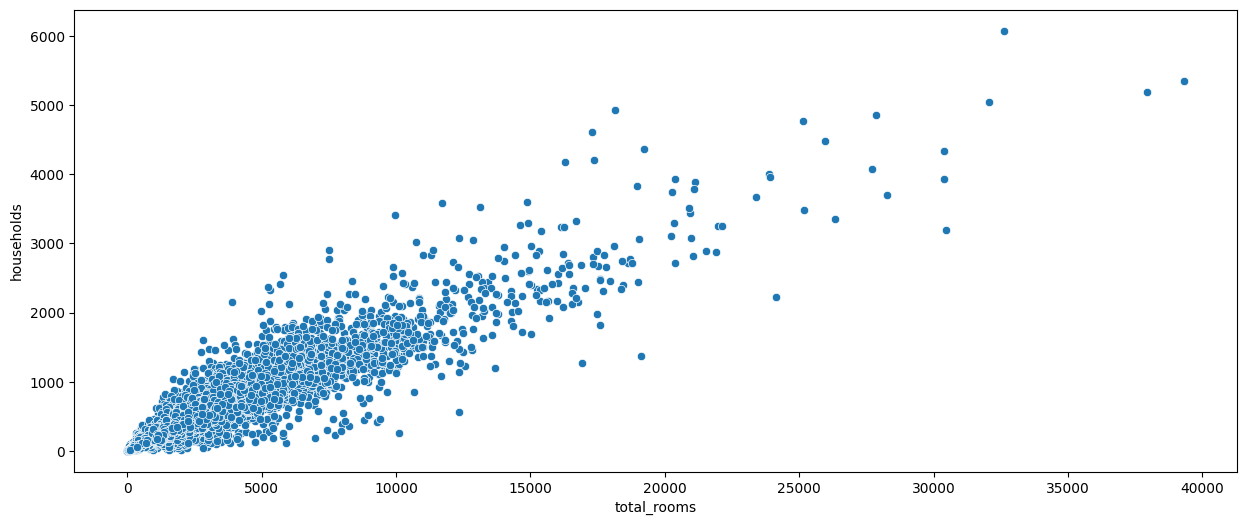

In [18]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df["total_rooms"],y=df["households"])

<Axes: xlabel='total_bedrooms', ylabel='population'>

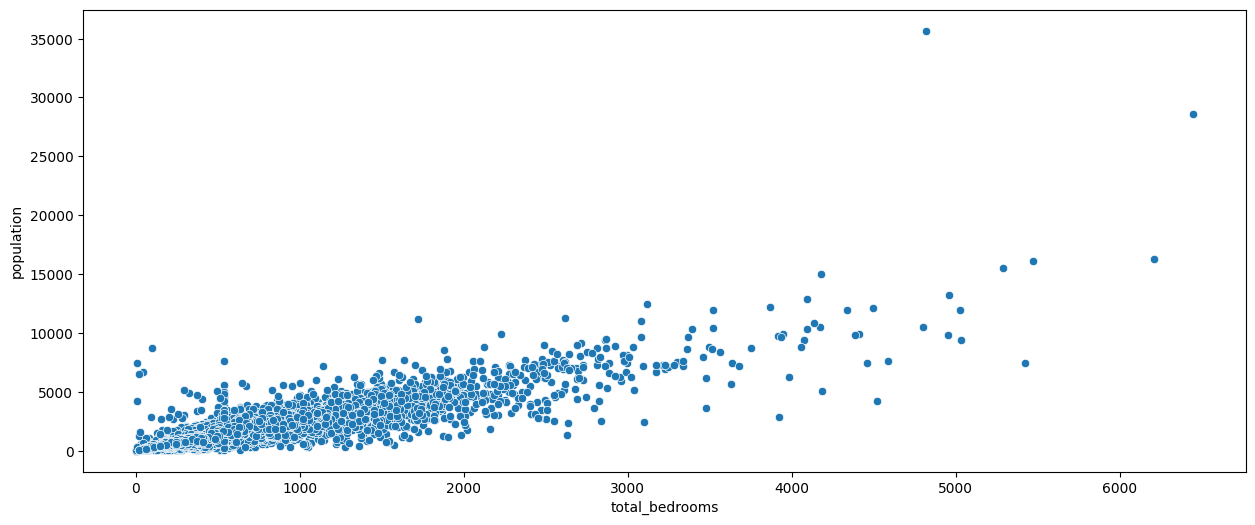

In [19]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df["total_bedrooms"],y=df["population"])

<Axes: xlabel='households', ylabel='median_house_value'>

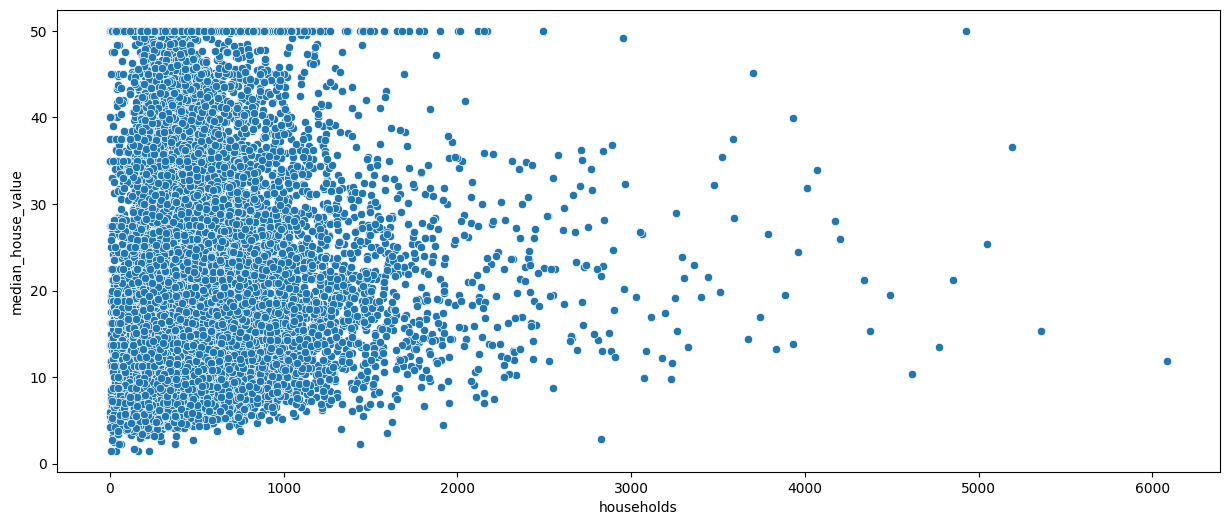

In [22]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df["households"],y=df["median_house_value"])

<Axes: >

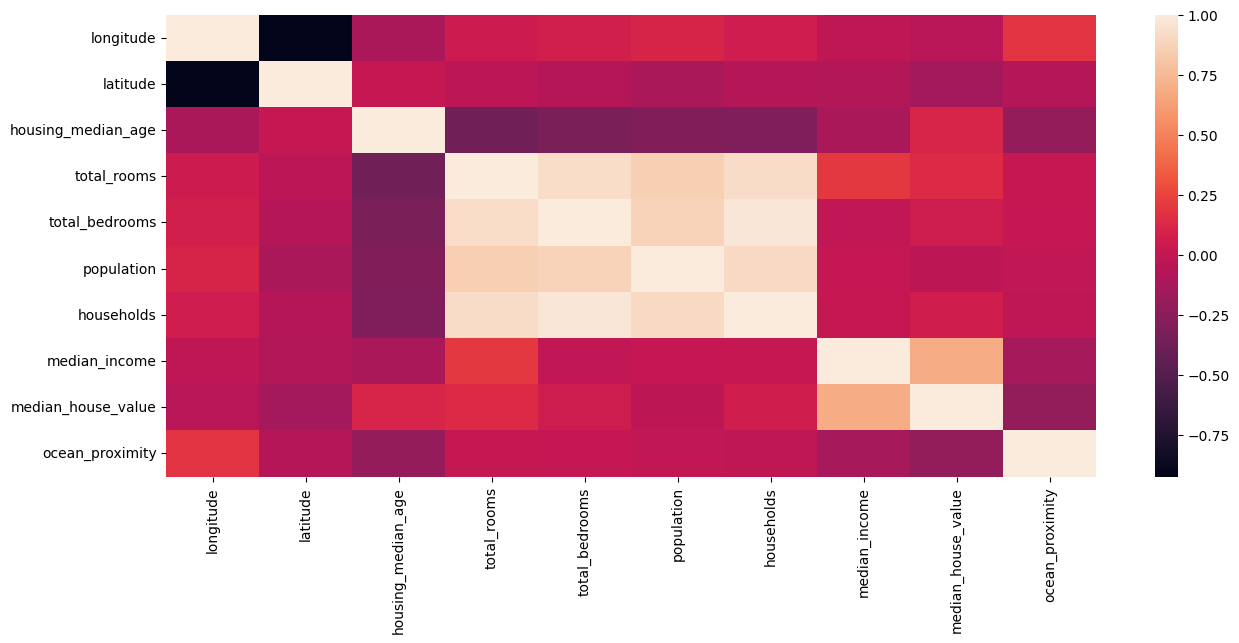

In [24]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr())

In [30]:
# dropping ocean_proximity column as its having lowest correlation with target variable median_house_value
df_copy = df.copy()

In [34]:
df_copy.drop("ocean_proximity",axis=1,inplace=True)

### Multivariate Analysis 

<Axes: xlabel='median_house_value', ylabel='median_income'>

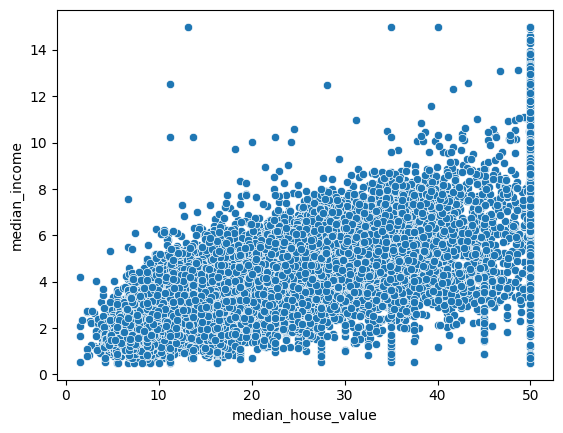

In [38]:
sns.scatterplot(x=df["median_house_value"],y=df["median_income"])

<Axes: xlabel='median_house_value', ylabel='Count'>

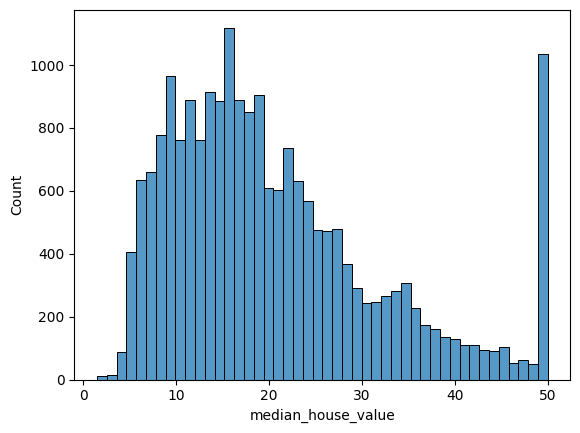

In [40]:
sns.histplot(df["median_house_value"])

<Axes: xlabel='population', ylabel='Count'>

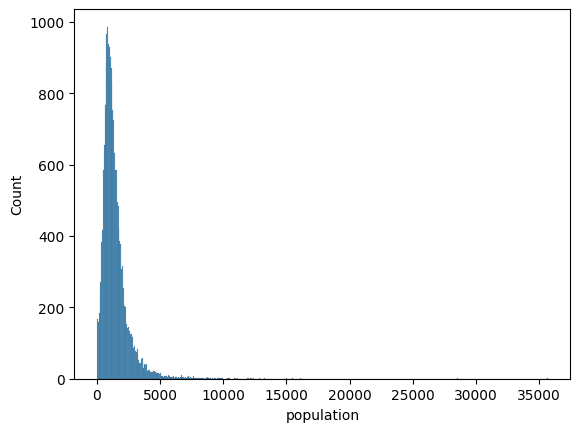

In [43]:
sns.histplot(df["population"])

In [45]:
from scipy.stats import zscore
zscores = zscore(df["population"])
threshold = 3
df_copy = df_copy[abs(zscores)<threshold]

In [46]:
df_copy

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129,322,126,8.3252,45.26
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,35.85
2,-122.24,37.85,52,1467,190,496,177,7.2574,35.21
3,-122.25,37.85,52,1274,235,558,219,5.6431,34.13
4,-122.25,37.85,52,1627,280,565,259,3.8462,34.22
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374,845,330,1.5603,7.81
20636,-121.21,39.49,18,697,150,356,114,2.5568,7.71
20637,-121.22,39.43,17,2254,485,1007,433,1.7000,9.23
20638,-121.32,39.43,18,1860,409,741,349,1.8672,8.47


In [48]:
df_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129,322,126,8.3252,45.26
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,35.85
2,-122.24,37.85,52,1467,190,496,177,7.2574,35.21
3,-122.25,37.85,52,1274,235,558,219,5.6431,34.13
4,-122.25,37.85,52,1627,280,565,259,3.8462,34.22


In [76]:
df_copy.to_csv("DF_for_ML.csv",index=False)

# conclusions
- population, total_rooms, total_bedrooms, households, these are the only highly correlated features
- median_income and median_house values have the highest correlation with target variable median_house_value
- dropped the "ocean_proximity_column" as for having the lowest correlation with the target variable.
- Removed the outliers wrt to population column
